Cargar el dataset FuelConsumptionCo2.csv en numpy

lo habitual es cargarlo con pandas

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import pickle as pkl

In [18]:
with open("FuelConsumptionCo2.csv", "br") as f:
    city_consumption = csv.load(f)
    
city_consumption

NameError: name 'csv' is not defined

In [3]:
print(city_consumption.dtype)

float64


In [ ]:

# Cargamos la columna 8 del CSV en un array de numpy: es la columna de consumo de combustible por ciudad
# city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1) # float64
city_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
ity_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
manufacturers = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)

In [23]:
print(city_consumption.dtype)
print(city_consumption.shape)

float32
(1067,)


In [24]:
manufacturers

array(['ACURA', 'ACURA', 'ACURA', ..., 'VOLVO', 'VOLVO', 'VOLVO'],
      shape=(1067,), dtype='<U13')

In [25]:
print(manufacturers.dtype)
print(manufacturers.shape)

<U13
(1067,)


In [26]:
print(f"Consumo medio en ciudad: {np.mean(city_consumption)}")
print(f"Consumo medio en carretera: {np.mean(road_consumption)}")
# print(f"Consumo medio en ciudad: {np.around(np.mean(city_consumption), 2):.2f}")
# print(f"Consumo medio en ciudad: {round(np.mean(city_consumption), 2):.2f}")

Consumo medio en ciudad: 13.29653263092041
Consumo medio en carretera: 9.474601745605469


In [27]:
print(f"Mediana de combustible en ciudad: {np.median(city_consumption)}")
print(f"Mediana de combustible en carretera: {np.median(road_consumption)}")

Mediana de combustible en ciudad: 12.600000381469727
Mediana de combustible en carretera: 8.800000190734863


In [28]:
print(f"Coche que más consume en ciudad: {np.max(city_consumption)}")
print(f"Coche que más consume en carretera: {np.max(road_consumption)}")

Coche que más consume en ciudad: 30.200000762939453
Coche que más consume en carretera: 20.5


In [29]:
print(f"Coche que menos consume en ciudad: {np.min(city_consumption)}")
print(f"Coche que menos consume en carretera : {np.min(road_consumption)}")

Coche que menos consume en ciudad: 4.599999904632568
Coche que menos consume en carretera : 4.900000095367432


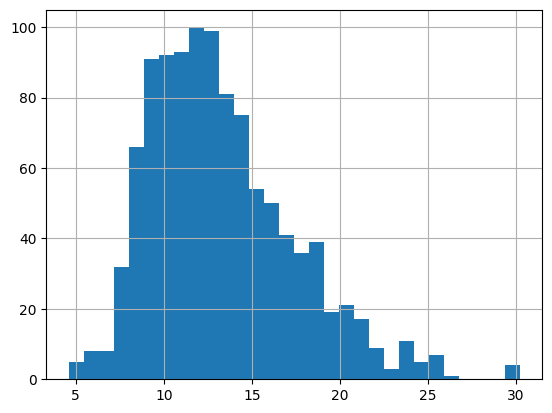

In [30]:
plt.hist(city_consumption, bins=30)

plt.grid()

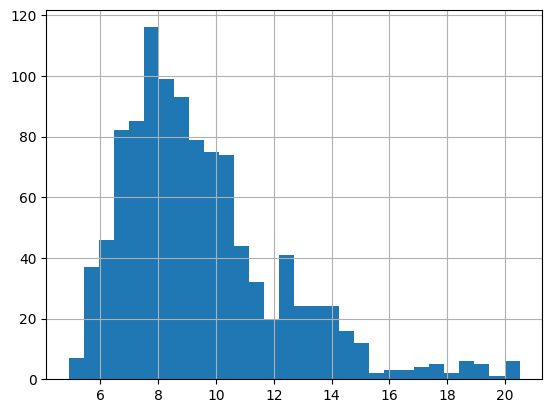

In [31]:
plt.hist(road_consumption, bins=30)
plt.grid()

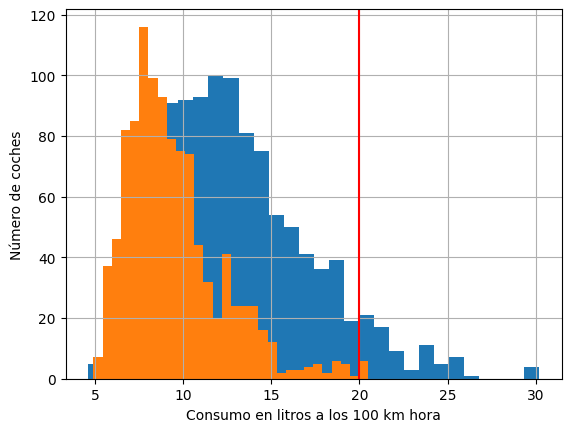

In [32]:
# superponer los gráficos
plt.hist(city_consumption, bins=30)
plt.hist(road_consumption, bins=30)
plt.xlabel("Consumo en litros a los 100 km hora")
plt.ylabel("Número de coches")
plt.axvline(20, color='red') # Limite de compra
plt.grid()

In [33]:
print(np.quantile(a = city_consumption, q = 0.5, interpolation = "lower"))
print(np.median(city_consumption))

12.6
12.6


In [34]:
print(np.quantile(a = city_consumption, q = [0.25, 0.50, 0.75], interpolation = "lower"))
# primer cuartil (Q1): 10,2 L/ 100 km - El 25 % de los coches consumen menos de 10,2 litros
# Mediana (Q2): 12,6 L / 100 km - El 50 % de los coches consumen menos de 12,6 litros
# Tercer cuartil (Q3): 15,5 L / 100 km - El 75 % consumen menos de 15,5 litros
# Esto nos interesa para poder detectar valores anómalos o que están muy alejados del 50 % central de los datos.

[10.2 12.6 15.5]


In [35]:


# numeros = [0.10 ,0.20, 0.30 ,0.40, 0.50]
# for i in numeros:
#    percentage = np.quantile(a = city_consumption, q = i, interpolation = "lower")
#    if percentage >= 8:
#        break
    

In [36]:
# Filtros: máscara booleana
city_consumption[city_consumption >= 26]
# df[df["city_consumption"] >= 26]

array([30. , 30.2, 26.7, 30. , 30.2], dtype=float32)

In [37]:
# rango 
print(f"Rango consumo ciudad: {np.max(city_consumption) - np.min(city_consumption)}")
print(f"Rango consumo carretera: {np.max(road_consumption) - np.min(road_consumption)}")

Rango consumo ciudad: 25.600000381469727
Rango consumo carretera: 15.600000381469727


In [38]:
# rango intercuartílico IQR: amplitud entre el primer cuartil (Q1) y el tercer cuartil (Q3): variabilidad central de los datos
# lo usaremos para calcular valores que sean anómalos, que están muy alejados de ese 50 % central de los datos
# cómo están distribuidos alrededor de la mediana
# 1.5 veces el IQR alejado se puede considerar un outlier o valor anómalo

Q1 = np.quantile(a = city_consumption, q = 0.25, interpolation = "lower")
Q3 = np.quantile(a = city_consumption, q = 0.75, interpolation = "lower")

IQR = Q3 - Q1
print(IQR)

# def remove_outliers(array):

5.3


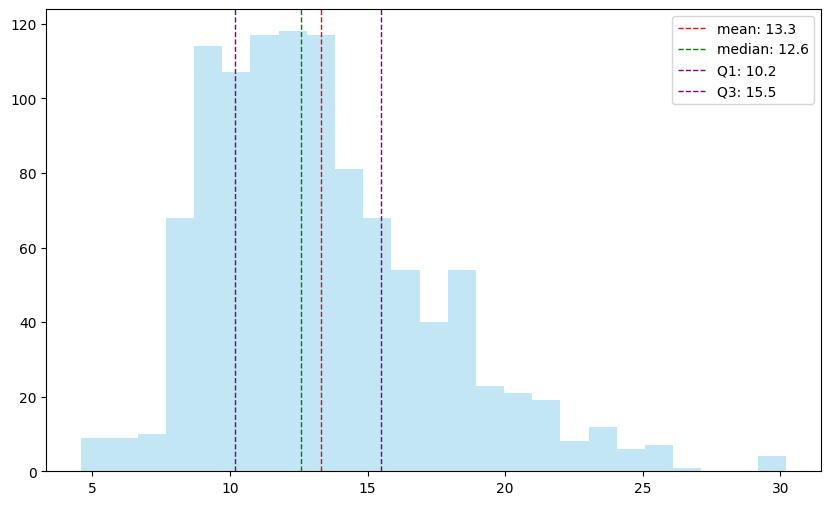

In [39]:
# pintar media, mediana, q1, q3, min, max en un histograma
city_mean = np.mean(city_consumption)
city_median = np.median(city_consumption)
city_min = np.min(city_consumption)
city_max = np.max(city_consumption)
city_q1 = np.quantile(a = city_consumption, q = 0.25, interpolation = "lower")
city_q3 = np.quantile(a = city_consumption, q = 0.75, interpolation = "lower")

plt.figure(figsize=(10, 6))
plt.hist(city_consumption, bins=25, color='skyblue', alpha=0.5)
plt.axvline(city_mean, color='red', linestyle='dashed', linewidth=1, label=f'mean: {city_mean:.1f}')
plt.axvline(city_median, color='green', linestyle='dashed', linewidth=1, label=f'median: {city_median:.1f}')
# plt.axvline(city_min, color='orange', linestyle='dashed', linewidth=1, label=f'min: {city_min:.1f}')
# plt.axvline(city_max, color='orange', linestyle='dashed', linewidth=1, label=f'max: {city_max:.1f}')
plt.axvline(city_q1, color='purple', linestyle='dashed', linewidth=1, label=f'Q1: {city_q1:.1f}')
plt.axvline(city_q3, color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {city_q3:.1f}')
# plt.grid()
plt.legend(loc=0) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.show()

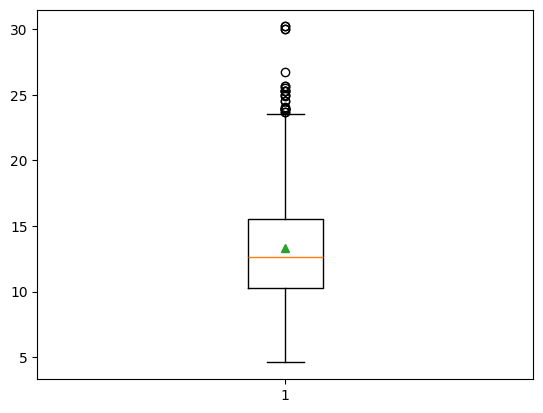

In [40]:
# punto y coma para evitar que muestre textos encima del gráfico, solo cuando es la última línea de la celda
# calcula y muestra la mediana, la media, rango IQR
# los puntos negros serían valores anómalos, outliers
plt.boxplot(city_consumption, showmeans=True);

In [41]:
# Filtrar usando percentiles
# print(np.quantile(city_consumption, 0.5))
# print(np.percentile(city_consumption, 50))

percentil_10 = np.percentile(city_consumption, 10)
percentil_90 = np.percentile(city_consumption, 90)
print(f"percentil 10: {percentil_10}")
print(f"percentil 90: {percentil_90}")

#Coches en el 10 % inferior (10 % de coches que menos consumen)
coches_menor_consumo = city_consumption[city_consumption <= percentil_10]

# 10 % coches que más consumen
coches_mayor_consumo = city_consumption[city_consumption >= percentil_90]

print("10 % coches menor consumo")
# print(coches_menor_consumo.shape)
print(f"media: {np.mean(coches_menor_consumo)}")
print("10 % coches mayor consumo")
# print(coches_mayor_consumo.shape)
print(f"media: {np.mean(coches_mayor_consumo)}")

percentil 10: 8.699999809265137
percentil 90: 18.799999237060547
10 % coches menor consumo
media: 7.8307013511657715
10 % coches mayor consumo
media: 21.574783325195312


In [42]:
# # Varianza: mide la dispersión de los consumos con rescpecto a la media
np.var(city_consumption)

np.float32(16.804516)

In [43]:
# desciación estándar: raíz cuadrada de la varianza, permite una mejor interpretación ya que estaría en las mismas unidades con las que estamos trabajando
np.std(city_consumption)
# de media, los consumos se desvían 4,1 Litros de la media


np.float32(4.0993314)

In [44]:
manufacturers

array(['ACURA', 'ACURA', 'ACURA', ..., 'VOLVO', 'VOLVO', 'VOLVO'],
      shape=(1067,), dtype='<U13')

In [45]:
from collections import Counter
contador = Counter(manufacturers)
contador.items()

# 10 mas frecuentes
contador.most_common(10)

# 10 menos frecuentes
manufaturers_sorted = sorted(contador.items(), key=lambda item: item[1])
manufaturers_sorted[:10]
# 10 mas frecuentes:
# manufaturers_sorted = sorted(contador.items(), key=lambda item: item[1], reverse=True)

[(np.str_('SMART'), 2),
 (np.str_('SRT'), 2),
 (np.str_('LAMBORGHINI'), 3),
 (np.str_('MASERATI'), 6),
 (np.str_('ASTON MARTIN'), 7),
 (np.str_('ROLLS-ROYCE'), 7),
 (np.str_('BENTLEY'), 8),
 (np.str_('SCION'), 9),
 (np.str_('FIAT'), 10),
 (np.str_('LINCOLN'), 11)]

In [46]:
for position, vehicle in enumerate(contador.items()):
    
    if 20 > position > 10:
        print(f"{vehicle[0]} {vehicle[1]}")

FORD 90
GMC 49
HONDA 21
HYUNDAI 24
INFINITI 21
JAGUAR 22
JEEP 31
KIA 33
LAMBORGHINI 3


In [47]:


# Mostrar los 5 fabricantes que más coches tienen en este dataset
top_10 = contador.most_common(10)
for fabricante, count in top_10:
    print(f"Fabricante {fabricante} tiene {count} coches")

Fabricante FORD tiene 90 coches
Fabricante CHEVROLET tiene 86 coches
Fabricante BMW tiene 64 coches
Fabricante MERCEDES-BENZ tiene 59 coches
Fabricante AUDI tiene 49 coches
Fabricante GMC tiene 49 coches
Fabricante TOYOTA tiene 49 coches
Fabricante PORSCHE tiene 44 coches
Fabricante VOLKSWAGEN tiene 42 coches
Fabricante DODGE tiene 39 coches


In [48]:
top_10

[(np.str_('FORD'), 90),
 (np.str_('CHEVROLET'), 86),
 (np.str_('BMW'), 64),
 (np.str_('MERCEDES-BENZ'), 59),
 (np.str_('AUDI'), 49),
 (np.str_('GMC'), 49),
 (np.str_('TOYOTA'), 49),
 (np.str_('PORSCHE'), 44),
 (np.str_('VOLKSWAGEN'), 42),
 (np.str_('DODGE'), 39)]

In [49]:
fabricantes, conteos =  zip(*top_10) # se puede con un for guardando en dos listas independientes

print(fabricantes)
print(conteos)

(np.str_('FORD'), np.str_('CHEVROLET'), np.str_('BMW'), np.str_('MERCEDES-BENZ'), np.str_('AUDI'), np.str_('GMC'), np.str_('TOYOTA'), np.str_('PORSCHE'), np.str_('VOLKSWAGEN'), np.str_('DODGE'))
(90, 86, 64, 59, 49, 49, 49, 44, 42, 39)


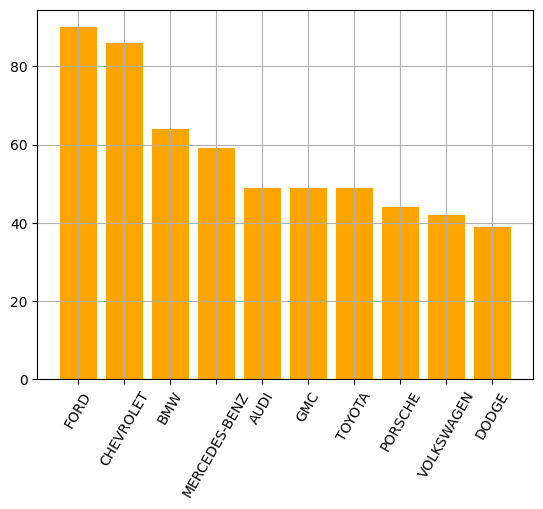

In [50]:
# plt.figure(figsize=(12, 8))
plt.bar(fabricantes, conteos, color='orange')
plt.xticks(rotation=60)
plt.grid()

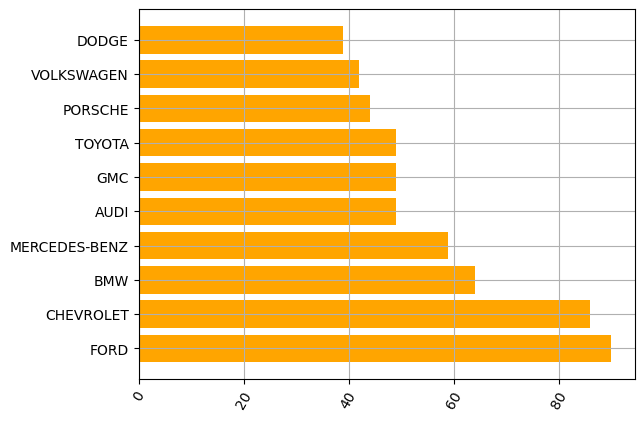

In [51]:
plt.barh(fabricantes, conteos, color='orange')
plt.xticks(rotation=60)
plt.grid()

In [52]:
conteos

(90, 86, 64, 59, 49, 49, 49, 44, 42, 39)

In [53]:
print (city_consumption)

[ 9.9 11.2  6.  ... 13.4 12.9 14.9]


In [54]:
# metodo para ver outliers

def filtrar_outliers(array):
    
    # calcular el Q1
    # calcular el Q3
    # calcular IQR
    # Filtro sobre array de 1.5 veces el IQR para límite inferior y límite superior
    # retornar array_filtrado
    pass

In [55]:

filtrados = filtrar_outliers(city_consumption)



In [56]:

def filtrar_outliers(city_consumption):

        city_q1 = np.quantile(city_consumption,0.25, method= "lower")
        city_q3 = np.quantile(city_consumption,0.75, method = "lower")
        
        iqr = city_q3- city_q1
        print (f" El iqr es: {iqr}")
        limite_inf= city_q1-1.5*iqr
        limite_sup= city_q3 + 1.5 *iqr
        
       
        
        
        print (f" Límite inferior: {limite_inf}, \n Límite superior: {limite_sup}")
       
        
        

#Curtosis


Curtosis city_consumption :0.9413409233093262
